In [50]:
import mne
import numpy as np
import pyedflib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from IPython.display import Image
from IPython.core.display import HTML 


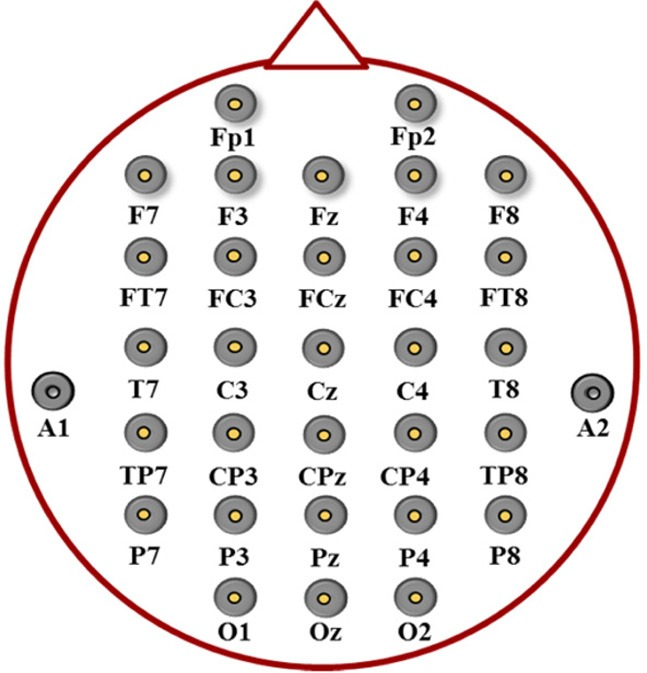

In [52]:
Image(filename = "../Electrode-placements-of-32-channels-according-to-the-international-10-20-system.jpeg", width=500, height=500)

In [14]:
filename = "../train/01_tcp_ar/00000005/s03_2010_10_02/00000005_s03_a00.edf"
f = pyedflib.EdfReader(filename)

In [18]:
n = f.signals_in_file
signal_labels = f.getSignalLabels()

In [54]:
signal_labels

#We see that all the the system is based on a single reference electrode.


['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

In [39]:
sigbufs = np.zeros((n, f.getNSamples()[0]))
print(sigbufs.shape)
for i in np.arange(n):
    print(i)
    sigbufs[i, :] = f.readSignal(i)

(36, 290500)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


ValueError: could not broadcast input array from shape (1162) into shape (290500)

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline

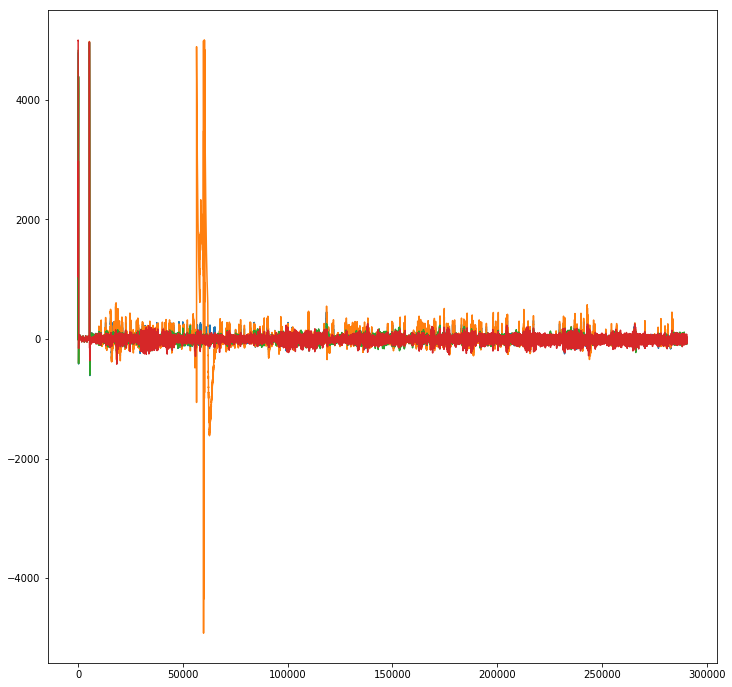

In [66]:
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.plot(np.arange(1, sigbufs.shape[1]+1), sigbufs[i])

In [73]:
labels = open("../train/01_tcp_ar/00000005/s03_2010_10_02/00000005_s03_a00.tse", "r")
labels = labels.read()

In [74]:
labels.split('\n')

['version = tse_v1.0.0', '', '0.0000 1162.0000 bckg 1.0000', '']

In [ ]:
class GRNN(nn.Module):
    def __init__(self):
        super(GRNN, self).__init__()
        self.gru1 = nn.GRU(22, )